# ETL and EDA

Libraries

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import warnings 
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

## Load data
There are 375 unique ids on each file. 

In [2]:
df_salary = pd.read_csv('..\\datasets\\1. Original Dataset\\salary.csv')
df_salary.info()
df_salary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      375 non-null    int64  
 1   Salary  373 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.0 KB


,id,Salary
0,0,90000.0
1,1,65000.0
2,2,150000.0
3,3,60000.0
4,4,200000.0


In [3]:
df_description = pd.read_csv('..\\datasets\\1. Original Dataset\\descriptions.csv')
df_description.info()
df_description.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           375 non-null    int64 
 1   Description  372 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


,id,Description
0,0,I am a 32-year-old male working as a Software ...
1,1,I am a 28-year-old data analyst with a Master'...
2,2,I am a 45-year-old Senior Manager with a PhD a...
3,3,I am a 36-year-old female Sales Associate with...
4,4,I am a 52-year-old male with over two decades ...


In [4]:
df_people = pd.read_csv('..\\datasets\\1. Original Dataset\\people.csv')
df_people.info()
df_people.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   Age                  370 non-null    float64
 2   Gender               370 non-null    object 
 3   Education Level      370 non-null    object 
 4   Job Title            370 non-null    object 
 5   Years of Experience  373 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.7+ KB


,id,Age,Gender,Education Level,Job Title,Years of Experience
0,0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,28.0,Female,Master's,Data Analyst,3.0
2,2,45.0,Male,PhD,Senior Manager,15.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,52.0,Male,Master's,Director,20.0


Merge data

In [5]:
df = df_people.merge(df_salary, on='id', how='left').merge(df_description, on='id', how='left')

## Minimal Profile Report
- There are no duplicated or missing ids.
- Very few missing values.
- There are not any outliers for numerical variables.
- Age, Education Level and Years of Experience are highly correlatid with Salary.

In [6]:
# profile = ProfileReport(df, title="EDA Report - Salary Dataset", explorative=True)
# profile.to_file("EDA_Report_Salary.html")
# profile.to_notebook_iframe()

- Missing values are not in the same row. I don't discard values nither fill them. Will use the information as it is.


In [7]:
df_missing = df[df.isna().any(axis=1)]
df_missing

,id,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Description
51,51,33.0,Male,Master's,NaN,7.0,85000.0,I am a 33-year-old Business Intelligence Analy...
60,60,51.0,Female,Master's,NaN,23.0,170000.0,I am a 51-year-old female with a Master's degr...
111,111,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0,NaN
125,125,26.0,Male,Bachelor's,Junior Accountant,2.0,40000.0,NaN
139,139,43.0,Female,NaN,Senior Product Marketing Manager,14.0,120000.0,I am a 43-year-old Senior Product Marketing Ma...
172,172,NaN,NaN,NaN,NaN,NaN,NaN,"As an employee, I bring a wealth of diverse ex..."
177,177,31.0,Male,Bachelor's,Junior Accountant,4.0,50000.0,NaN
219,219,40.0,NaN,Bachelor's,Senior Sales Representative,12.0,100000.0,I am a 40-year-old Senior Sales Representative...
221,221,NaN,Female,Bachelor's,Junior Social Media Specialist,3.0,45000.0,I am a 31-year-old female currently working as...
225,225,40.0,NaN,Bachelor's,Senior Marketing Manager,11.0,105000.0,I am a 40-year-old Senior Marketing Manager wi...


---
# Categorical Variables

In [8]:
# Convert Gender to numerical (label encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [9]:
# Unique values of Education Level
unique_education_levels = df['Education Level'].unique()
print(unique_education_levels)

# Encode Education Level (ordinal encoding)
education_order = ["Bachelor's", "Master's", 'PhD']
df['Education Level'] = df['Education Level'].astype('category').cat.set_categories(education_order, ordered=True).cat.codes

["Bachelor's" "Master's" 'PhD' nan]


In [10]:
# Unique values of Job Title
unique_job_titles = df['Job Title'].unique()
print(unique_job_titles)

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 nan 'Event Coordinator' 'VP of Finance' 'Graphic Designer'
 'UX Researc

In [11]:
# Encode Job Title (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Job Title'], drop_first=True)

---
# Correlation

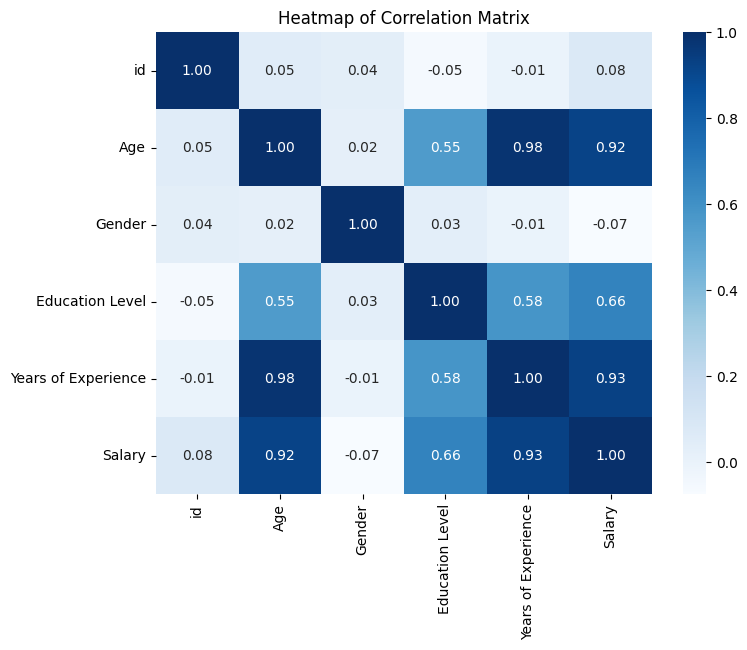

In [12]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues', fmt=".2f")

# Show the plot
plt.title("Heatmap of Correlation Matrix")
plt.show()